<a href="https://colab.research.google.com/github/hiteshtiwari7/BANK-MARKETING-CAMPAIGN/blob/main/BankMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BANK MARKETING CAMPAIGN**

---
### **Objective :**


1.   The goal is to predict if the client will subscribe a term deposit with that bank or not.
2.   To get crucial insights and patterns from the data and build Machine learning models which helps in good predictions. 

---
### **Market Research and Prediction**
Machine learning in conjunction with big data can not only collect information but also find specific patterns. For eg. it is possible to foresee whether a person will accept the promotional offer, determine the most profitable ideas for investing, fraud detection, study competitors, and identify security weaknesses.

Machine Learning allows companies to reduce costs, it is logical that it also helps increase profits due to improved customer service.

### **Data Set Information:**


*   The data is related with direct marketing campaigns of a Portuguese banking
institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
*   The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)


*   The dataset is available here https://www.kaggle.com/datasets/edith2021/bank-marketing-campaign


---





### **Attribute Information:**

Input variables:

**bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (categorical: 'no','yes','unknown')

8 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

9 - contact: contact communication type (categorical: 'cellular','telephone')

10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')



Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: 'yes','no')






In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df = pd.read_csv("/content/drive/MyDrive/bank-full.csv", sep = ";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
df=df.drop_duplicates()
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.rename(columns={'y': 'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# **Data Visualization**

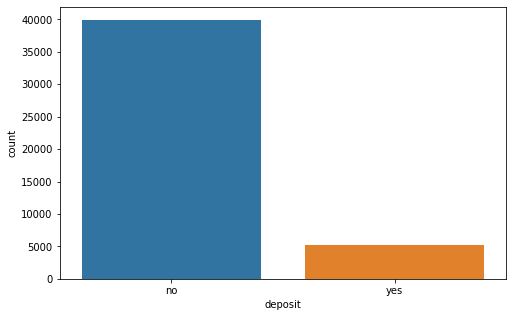

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['deposit'],data=df)


As from the above plot, we can see that majority of datapoints belong to No class labels with 88.7% and minority of class belongs to 11.3%.

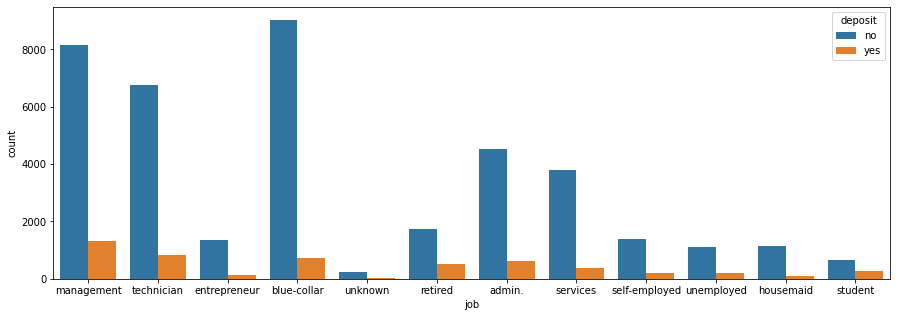

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'job', hue = 'deposit')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


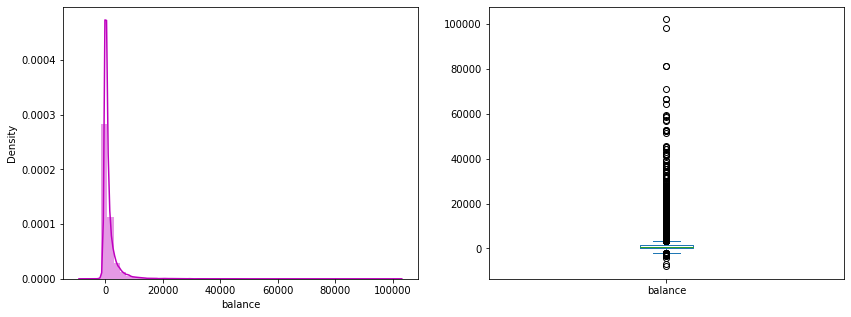

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['balance'], color='m')

plt.subplot(122)
df['balance'].plot(kind='box',figsize=(14,5))

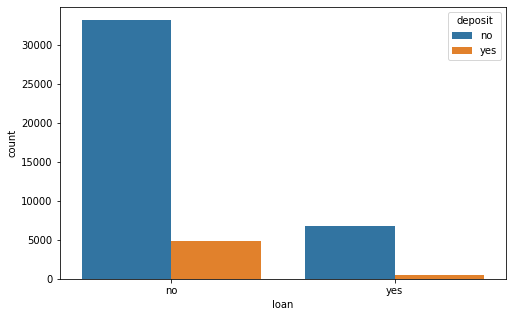

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = 'loan', hue = 'deposit')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


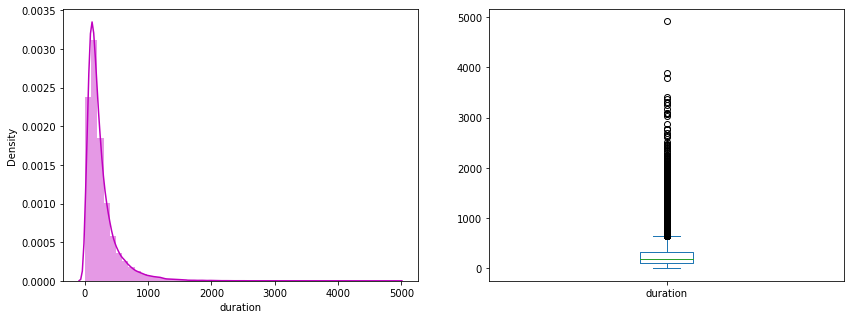

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['duration'], color='m')

plt.subplot(122)
df['duration'].plot(kind='box',figsize=(14,5))

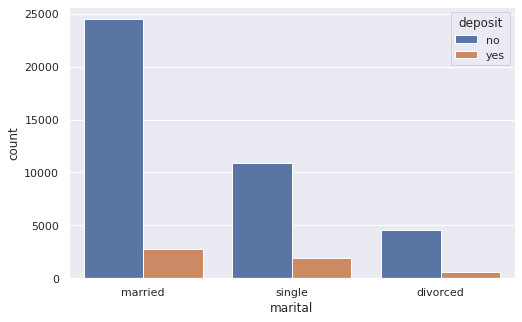

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = 'marital', hue = 'deposit')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


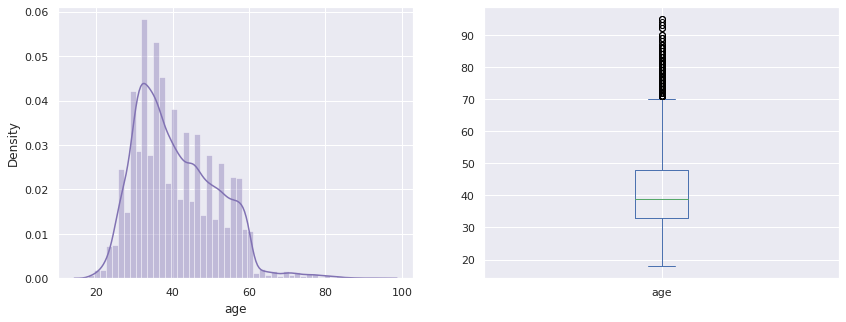

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['age'], color='m')

plt.subplot(122)
df['age'].plot(kind='box',figsize=(14,5))

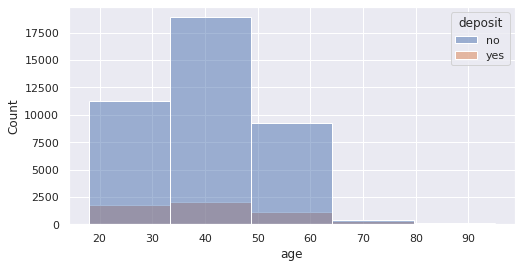

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data = df, x = 'age',bins=5, hue = 'deposit')

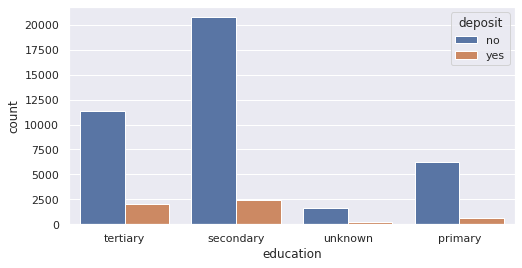

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data = df, x = 'education', hue = 'deposit')

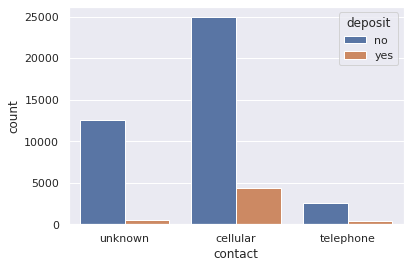

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'contact', hue = 'deposit')

# Data Transformation

In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
#isolate the x and y variables
y = df.iloc[:, -1].values
X = df._get_numeric_data()
X.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [9]:
#isolate the categorical variables
df_categorical = df.select_dtypes(exclude = "number")
df_categorical.head()


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [10]:
#tranform categorical variables into dummy variables
df_categorical = pd.get_dummies(data = df_categorical, drop_first = True)

In [11]:
#joining numerical and categorical datasets
df_final = pd.concat([X, df_categorical], axis = 1)
df_final

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


# Model Building - ADABoost

In [12]:
#isolate the x and y variables
y = df_final.iloc[:, -1].values
X = df_final.iloc[:, :-1].values

In [13]:
#Importing Modules
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn. model_selection import train_test_split

In [14]:
#split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=123)

In [15]:
from imblearn.over_sampling import SMOTE
# create SMOTE variable with samping strat of 0.5
sm = SMOTE(sampling_strategy=0.5, random_state=0)
# apply smote to our X_train and y_train 
X_train, y_train = sm.fit_resample(X_train, y_train)
# Check to see what the class balance looks like now 
print (np.unique(y_train, return_counts=True) , np.bincount(y_train))

(array([0, 1], dtype=uint8), array([31936, 15968])) [31936 15968]


In [16]:
#Instantiate a classifier
ada = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=1,
                                        min_samples_split=2,
                                        max_leaf_nodes=5),
                                         algorithm="SAMME",
                                         n_estimators=1000,learning_rate=0.2)

In [17]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_leaf_nodes=5),
                   learning_rate=0.2, n_estimators=1000)

In [18]:
y_pred=ada.predict(X_test)

In [19]:
#Evaluation metrics
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")

0.8885325666261197 : is the accuracy score
0.5249745158002038 : is the precision score
0.48722800378429515 : is the recall score
0.5053974484789008 : is the f1 score


In [18]:
#Hyperparameter Tuning using Grid Search
ada_1 = GridSearchCV(ada, {'learning_rate':[0.1,0.15,0.20],'n_estimators':[500, 750, 1000]}, scoring='f1')
ada_1.fit(X_train,y_train)
print(ada_1.best_score_)
print(ada_1.best_params_)

0.8067361274476031
{'learning_rate': 0.2, 'n_estimators': 1000}


In [19]:
#Using best parameters
ada_2 =  AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=1,
                                        min_samples_split=2,
                                        max_leaf_nodes=5),
                                        n_estimators=1000, learning_rate=0.2)

ada_2.fit(X_train,y_train)
y_pred=ada_2.predict(X_test)

In [20]:
#Evaluation metrics
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")

0.8941722879575362 : is the accuracy score
0.5588235294117647 : is the precision score
0.44938505203405865 : is the recall score
0.498164656528579 : is the f1 score


# Model Building - XGBoost

In [20]:
#importing modules
import xgboost as xgb
from xgboost import XGBClassifier

In [21]:
#getting names of columns
feature_columns = list(df_final.columns.values)
feature_columns = feature_columns[:-1]

In [22]:
#create xgboost matrices part 2
Train = xgb.DMatrix(X_train, label = y_train, feature_names = feature_columns)
Test = xgb.DMatrix(X_test, label = y_test, feature_names = feature_columns)


In [27]:
#set the parameters part 1
parameters1 = {'learning_rate': 0.3,
               'max_depth': 2,
               'colsample_bytree': 1,
               'subsample': 1,
               'min_child_weight': 1,
               'gamma': 0, 
               'random_state': 123,
               'scale_pos_weight':'2',
               'eval_metric': "auc",
               'objective': "binary:logistic"}

#run XGBoost
model1 = xgb.train(params = parameters1,
                   dtrain = Train,
                   num_boost_round = 200,
                   evals = [(Test, "Yes")],
                   verbose_eval = 50)

[0]	Yes-auc:0.759157
[50]	Yes-auc:0.914541
[100]	Yes-auc:0.919344
[150]	Yes-auc:0.921812
[199]	Yes-auc:0.923037


In [28]:
#Predictions part 1
predictions1 = model1.predict(Test)
predictions1 = np.where(predictions1 > 0.5, 1, 0)

#Confusion MAtrix
confusion_matrix1 = confusion_matrix(y_test, predictions1)
print(confusion_matrix1)



[[7298  688]
 [ 310  747]]


In [29]:
#Evaluation metrics
print(accuracy_score(y_test, predictions1), ": is the accuracy score")
print(precision_score(y_test, predictions1), ": is the precision score")
print(recall_score(y_test, predictions1), ": is the recall score")
print(f1_score(y_test, predictions1), ": is the f1 score")

0.8896383943381622 : is the accuracy score
0.5205574912891986 : is the precision score
0.706717123935667 : is the recall score
0.5995184590690208 : is the f1 score


#############################################################################################

In [30]:
# Instantiate a XGboost classifier
classifier = XGBClassifier(objective = "binary:logistic")
#set parameter tuning 
tune_grid = {'learning_rate': [0.05,0.1],
               'max_depth': range(2,8,2),
               'colsample_bytree': [0.5,0.8],
               'subsample': [1],
               'min_child_weight': range(1,2),
               'gamma': [0,0.1], 
               'random_state': [123],
               'n_estimators': [250, 500],
               'booster': ["gbtree"]} 

In [31]:
#Cross Validation Assembly
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = tune_grid,
                            scoring = "auc",
                            n_jobs =-1,
                            cv = 5,
                            verbose = 5)

In [32]:
#Setting evaluation parameters
evaluation_parameters = {"early_stopping_rounds": 50,
                         "eval_metric": "auc",
                         "eval_set": [(X_test, y_test)]}

In [44]:
#Hyperparameter tuning and cross validation
tune_model = grid_search.fit(X = X_train,
                             y = y_train,
                             **evaluation_parameters)
grid_search.best_params_, grid_search.best_score_


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[0]	validation_0-auc:0.861812
Will train until validation_0-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.858728
[2]	validation_0-auc:0.876904
[3]	validation_0-auc:0.882752
[4]	validation_0-auc:0.893196
[5]	validation_0-auc:0.896571
[6]	validation_0-auc:0.896394
[7]	validation_0-auc:0.901922
[8]	validation_0-auc:0.902418
[9]	validation_0-auc:0.905145
[10]	validation_0-auc:0.90568
[11]	validation_0-auc:0.906854
[12]	validation_0-auc:0.905036
[13]	validation_0-auc:0.904218
[14]	validation_0-auc:0.90456
[15]	validation_0-auc:0.907552
[16]	validation_0-auc:0.908526
[17]	validation_0-auc:0.909434
[18]	validation_0-auc:0.909551
[19]	validation_0-auc:0.910444
[20]	validation_0-auc:0.910965
[21]	validation_0-auc:0.9118
[22]	validation_0-auc:0.912781
[23]	validation_0-auc:0.9129
[24]	validation_0-auc:0.912317
[25]	validation_0-auc:0.913583
[26]	validation_0-auc:0.913858
[27]	validation_0-auc:0.913857
[28]	validation_0-auc:

({'booster': 'gbtree',
  'colsample_bytree': 0.5,
  'gamma': 0,
  'learning_rate': 0.1,
  'max_depth': 6,
  'min_child_weight': 1,
  'n_estimators': 500,
  'random_state': 123,
  'subsample': 1},
 0.8388453573109078)

###########################################################################################

In [34]:
#set the parameters 
parameters3= {'learning_rate': 0.1,
               'max_depth': 6,
               'colsample_bytree': 0.5,
               'subsample': 1,
               'min_child_weight': 1,
               'gamma': 0, 
               'random_state': 123,
               'eval_metric': "auc",
               'scale_pos_weight':'2',
               'objective': "binary:logistic"}

In [35]:
#run XGBoost 
model3 = xgb.train(params = parameters3,
                   dtrain = Train,
                   num_boost_round = 320,
                   evals = [(Test, "Yes")],
                   verbose_eval = 50)


[0]	Yes-auc:0.638161
[50]	Yes-auc:0.923558
[100]	Yes-auc:0.927224
[150]	Yes-auc:0.929365
[200]	Yes-auc:0.929688
[250]	Yes-auc:0.929634
[300]	Yes-auc:0.92938
[319]	Yes-auc:0.929338


In [36]:
#Predictions part 1
predictions_0 = model3.predict(Test)
predictions_0 = np.where(predictions_0 > 0.5, 1, 0)

#Confusion Matrix
confusion_matrix1 = confusion_matrix(y_test, predictions_0)
print(confusion_matrix1)


[[7427  559]
 [ 340  717]]


In [37]:
#Evaluation metrics
print(accuracy_score(y_test, predictions_0), ": is the accuracy score")
print(precision_score(y_test, predictions_0), ": is the precision score")
print(recall_score(y_test, predictions_0), ": is the recall score")
print(f1_score(y_test, predictions_0), ": is the f1 score")

0.9005860886873825 : is the accuracy score
0.5619122257053292 : is the precision score
0.6783349101229896 : is the recall score
0.6146592370338619 : is the f1 score


In [46]:
#Predictions part 2
predictions_1 = model3.predict(Test)
predictions_1 = np.where(predictions_1 > 0.25, 1, 0)

#Confusion Matrix
confusion_matrix2 = confusion_matrix(y_test, predictions_1)
print(confusion_matrix2)


[[6908 1078]
 [ 161  896]]


In [47]:
#Evaluation metrics
print(accuracy_score(y_test, predictions_1), ": is the accuracy score")
print(precision_score(y_test, predictions_1), ": is the precision score")
print(recall_score(y_test, predictions_1), ": is the recall score")
print(f1_score(y_test, predictions_1), ": is the f1 score")

0.8629879464779387 : is the accuracy score
0.45390070921985815 : is the precision score
0.847682119205298 : is the recall score
0.5912240184757506 : is the f1 score


In [48]:
#Predictions part 3
predictions_2 = model3.predict(Test)
predictions_2 = np.where(predictions_2 > 0.05, 1, 0)

#Confusion Matrix
confusion_matrix3 = confusion_matrix(y_test, predictions_2)
print(confusion_matrix3)


[[5647 2339]
 [  37 1020]]


In [49]:
#Evaluation metrics
print(accuracy_score(y_test, predictions_2), ": is the accuracy score")
print(precision_score(y_test, predictions_2), ": is the precision score")
print(recall_score(y_test, predictions_2), ": is the recall score")
print(f1_score(y_test, predictions_2), ": is the f1 score")

0.7372553356187106 : is the accuracy score
0.3036618041083656 : is the precision score
0.9649952696310312 : is the recall score
0.4619565217391305 : is the f1 score


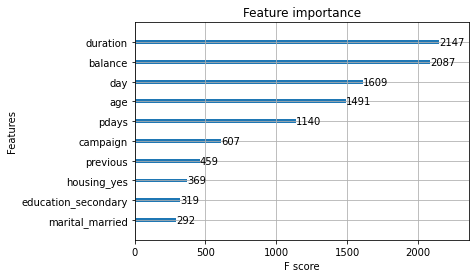

In [50]:
#plot importances
xgb.plot_importance(model3, max_num_features = 10)
